# **\[PL\]** Lesson1: 단순선형회귀

신록예찬  
2022-09-21

In [89]:
import torch
import pandas as pd
import matplotlib.pyplot as plt 
import pytorch_lightning as pl 

# ref

ref:
<https://guebin.github.io/DL2022/posts/II.%20DNN/2022-09-20-3wk-2.html>

# Regression 1: CPU

In [63]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DL2022/main/posts/II.%20DNN/2022-09-22-regression.csv")

In [64]:
x= torch.tensor(df.x).reshape(-1,1).float()
y= torch.tensor(df.y).reshape(-1,1).float()

In [65]:
ds = torch.utils.data.TensorDataset(x,y)
dl = torch.utils.data.DataLoader(ds,batch_size=100)

In [66]:
class NetLO(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.linr = torch.nn.Linear(1,1)
        self.loss_fn = torch.nn.MSELoss()
    def forward(self,x):
        yhat = self.linr(x)
        return yhat
    def configure_optimizers(self):
        optimizr = torch.optim.SGD(self.parameters(), lr=0.1)
        return optimizr 
    def training_step(self,batch,batch_idx):
        x,y = batch
        yhat = self(x)
        loss = self.loss_fn(yhat,y) 
        return loss 

In [67]:
net = NetLO()

In [68]:
trnr = pl.Trainer(max_epochs=1)

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/pytorch_lightning/trainer/trainer.py:1767: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  category=PossibleUserWarning,

In [69]:
net.linr.bias.data = torch.tensor([-5.0])
net.linr.weight.data = torch.tensor([[10.0]])

In [70]:
trnr.fit(net, train_dataloaders=dl) 


  | Name    | Type    | Params
------------------------------------
0 | linr    | Linear  | 2     
1 | loss_fn | MSELoss | 0     
------------------------------------
2         Trainable params
0         Non-trainable params
2         Total params
0.000     Total estimated model params size (MB)
`Trainer.fit` stopped: `max_epochs=1` reached.

In [71]:
net.linr.weight, net.linr.bias

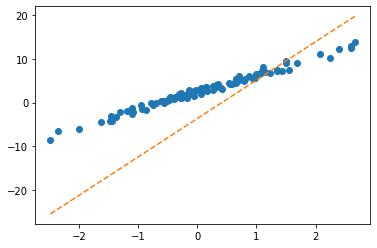

In [72]:
plt.plot(x,y,'o')
plt.plot(x,net(x).data,'--')

# Regression 2: GPU

In [73]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DL2022/main/posts/II.%20DNN/2022-09-22-regression.csv")

In [74]:
x= torch.tensor(df.x).reshape(-1,1).float()
y= torch.tensor(df.y).reshape(-1,1).float()

In [75]:
ds = torch.utils.data.TensorDataset(x,y)
dl = torch.utils.data.DataLoader(ds,batch_size=100)

In [76]:
class NetLO(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.linr = torch.nn.Linear(1,1)
        self.loss_fn = torch.nn.MSELoss()
    def forward(self,x):
        yhat = self.linr(x)
        return yhat
    def configure_optimizers(self):
        optimizr = torch.optim.SGD(self.parameters(), lr=0.1)
        return optimizr 
    def training_step(self,batch,batch_idx):
        x,y = batch
        yhat = self(x)
        loss = self.loss_fn(yhat,y) 
        return loss 

In [77]:
net = NetLO()

In [84]:
trnr = pl.Trainer(max_epochs=1, accelerator='gpu', devices=1)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

In [85]:
net.linr.bias.data = torch.tensor([-5.0])
net.linr.weight.data = torch.tensor([[10.0]])

In [86]:
trnr.fit(net, train_dataloaders=dl) 

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | linr    | Linear  | 2     
1 | loss_fn | MSELoss | 0     
------------------------------------
2         Trainable params
0         Non-trainable params
2         Total params
0.000     Total estimated model params size (MB)
`Trainer.fit` stopped: `max_epochs=1` reached.

In [87]:
net.linr.weight, net.linr.bias

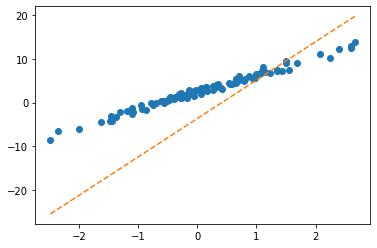

In [88]:
plt.plot(x,y,'o')
plt.plot(x,net(x).data,'--')